In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tumblr Vietnam/heart-disease.csv')
df = pd.read_csv('/content/drive/MyDrive/Tumblr Vietnam/heart-disease.csv')

In [ ]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]
print(f'Bộ dữ liệu còn {len(data)}')

Bộ dữ liệu còn 296


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

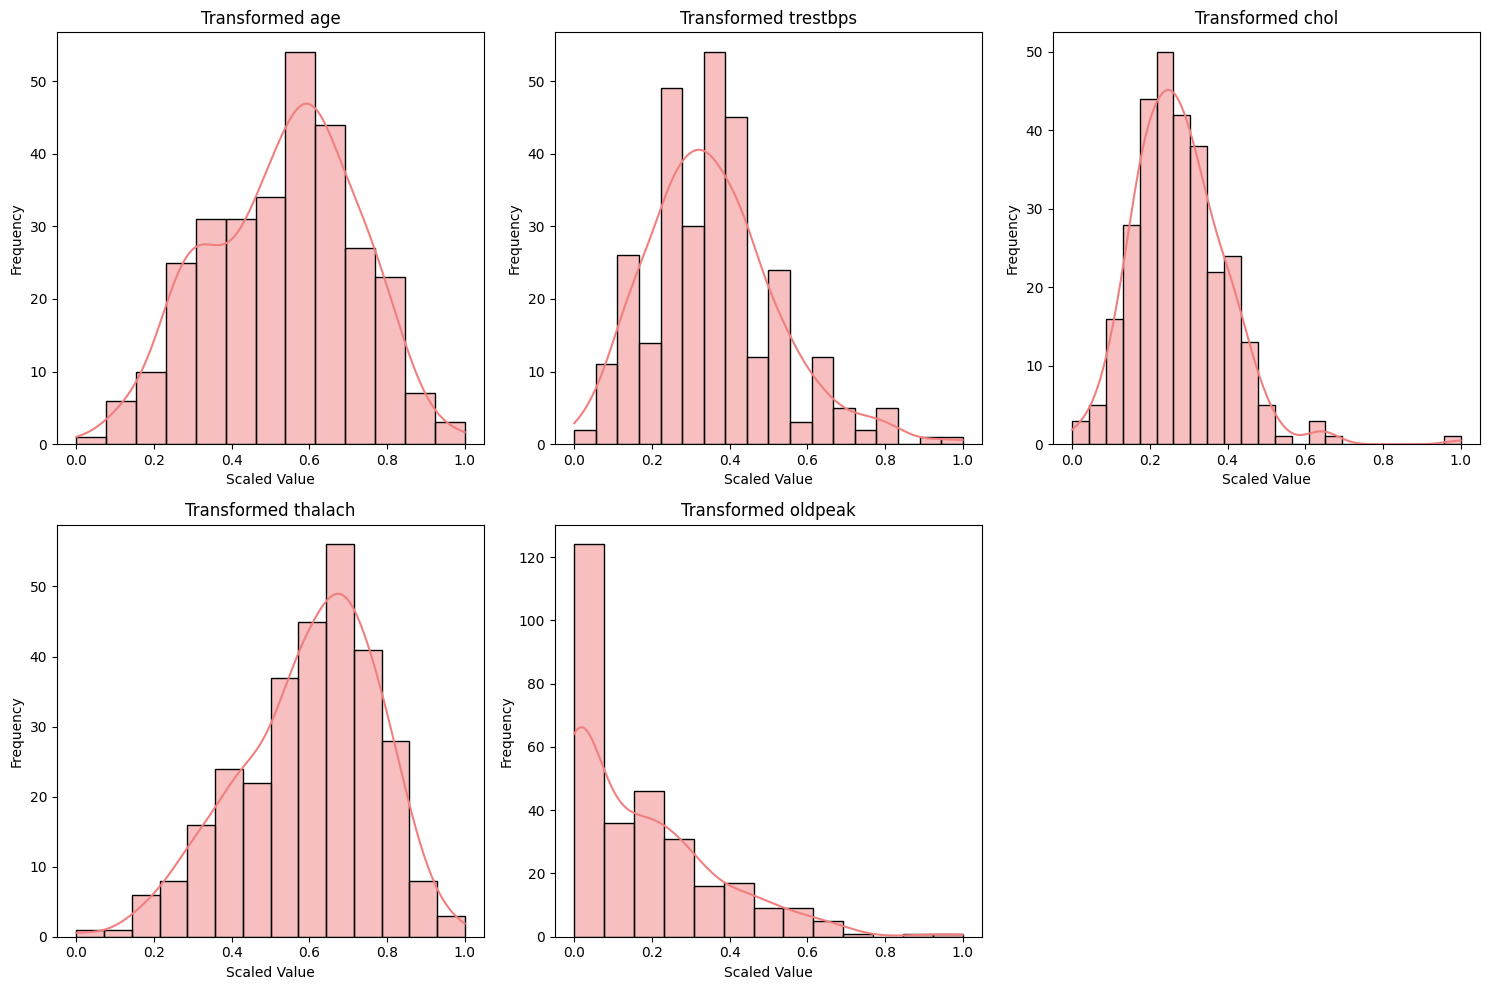

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaled_data = scaler.fit_transform(data[columns_to_scale])
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(2, 3, i)
    sns.histplot(scaled_data[:, i-1], kde=True, color='#f08080')
    plt.title(f'Transformed {column}')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

In [ ]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'XGboost Classifier': XGBClassifier(),
    'Support Vector Machine': SVC(),
    'Naye base Classifier': GaussianNB()

}

def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)

    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[model_name] = score

    return model_scores


In [ ]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8666666666666667,
 'KNN': 0.8833333333333333,
 'RandomForestClassifier': 0.85,
 'AdaBoost': 0.8666666666666667,
 'GradientBoosting': 0.8333333333333334,
 'LinearDiscriminantAnalysis': 0.8666666666666667,
 'QuadraticDiscriminantAnalysis': 0.8666666666666667,
 'XGboost Classifier': 0.7833333333333333,
 'Support Vector Machine': 0.8333333333333334,
 'Naye base Classifier': 0.9}

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': list(range(1, 10)),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, params, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất và điểm số tương ứng
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)
knn = gs.best_estimator_


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score: 0.856159420289855


In [ ]:
knn


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Huấn luyện mô hình KNN với siêu tham số tốt nhất
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính các điểm đánh giá
training_accuracy = accuracy_score(y_train, y_train_pred)
training_recall = recall_score(y_train, y_train_pred)
training_precision = precision_score(y_train, y_train_pred)
training_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Training Recall:", training_recall)
print("Training Precision:", training_precision)
print("Training F1 Score:", training_f1)
print("Test Accuracy:", test_accuracy)
print("Test Recall:", test_recall)
print("Test Precision:", test_precision)
print("Test F1 Score:", test_f1)


Training Accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0
Training F1 Score: 1.0
Test Accuracy: 0.8666666666666667
Test Recall: 0.875
Test Precision: 0.875
Test F1 Score: 0.875


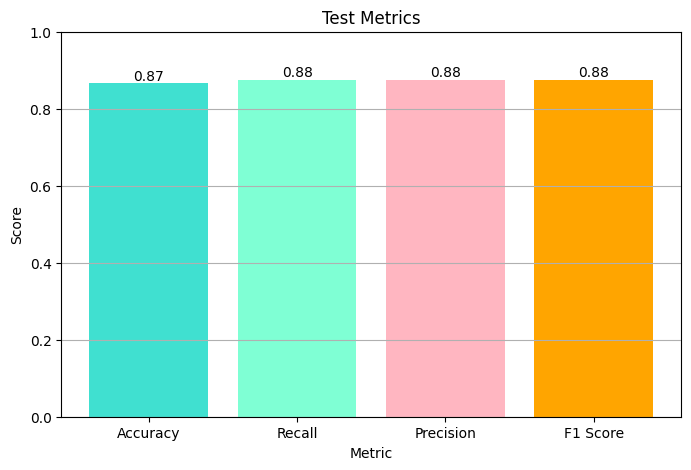

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các metric và giá trị tương ứng
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
test_scores = [test_accuracy, test_recall, test_precision, test_f1]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, test_scores, color=['#40e0d0', '#7fffd4', '#ffb6c1', 'orange'])
plt.title('Test Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.grid(axis='y')

# Thêm giá trị cho mỗi cột
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd

evaluation_data = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],

    'Test': [test_accuracy, test_recall, test_precision, test_f1]
}

evaluation_df = pd.DataFrame(evaluation_data)
evaluation_df


,Metric,Test
0,Accuracy,0.866667
1,Recall,0.875000
2,Precision,0.875000
3,F1 Score,0.875000


Text(95.72222222222221, 0.5, 'Truh')

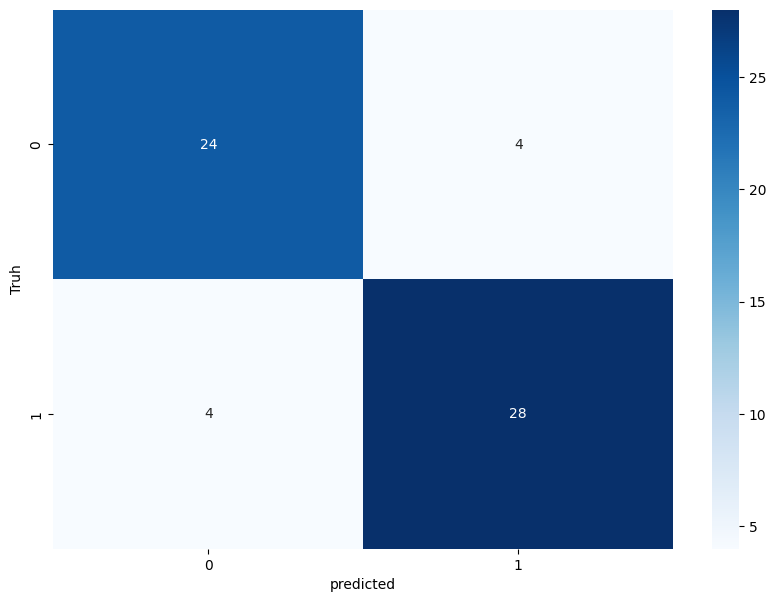

In [ ]:
cm1 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Truh')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold

lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr,
                         space,
                         random_state=0,
                         cv = 5,
                         scoring='accuracy')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)


Best Hyperparameters: {'C': 2.1879360563134624, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [ ]:
lr

LogisticRegression(C=2.1879360563134624, solver='liblinear')

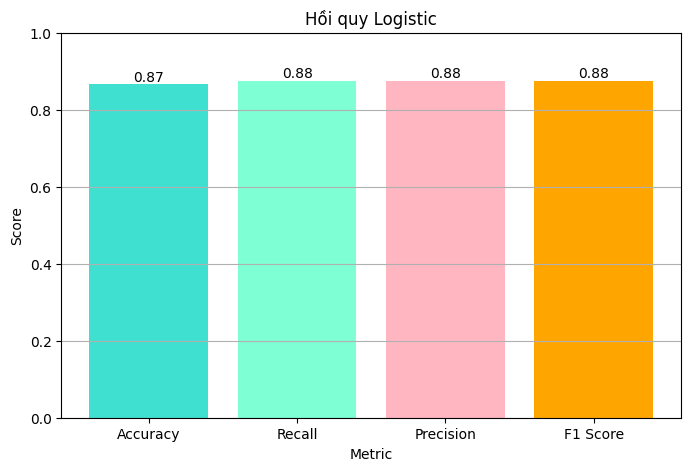

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các metric và giá trị tương ứng
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
test_scores = [test_accuracy, test_recall, test_precision, test_f1]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, test_scores, color=['#40e0d0', '#7fffd4', '#ffb6c1', 'orange'])
plt.title('Hồi quy Logistic')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.grid(axis='y')

# Thêm giá trị cho mỗi cột
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()


Text(95.72222222222221, 0.5, 'Truh')

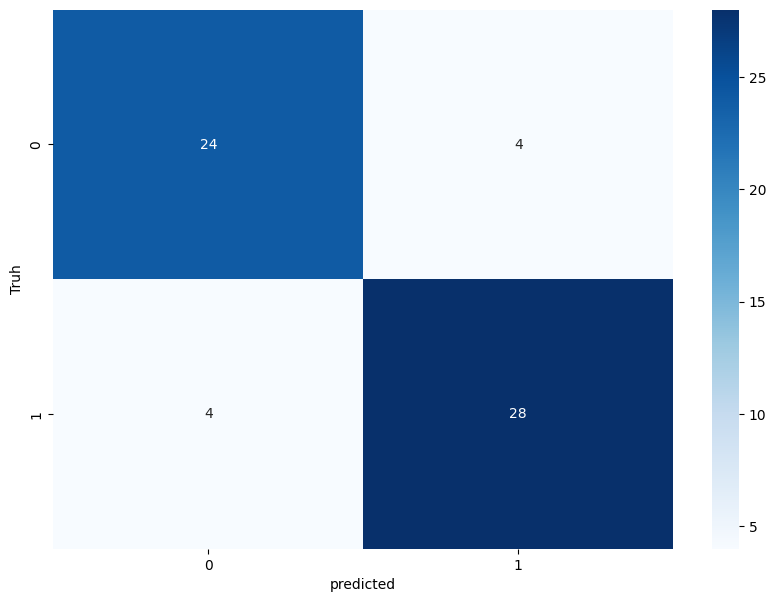

In [ ]:
cm1 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Truh')

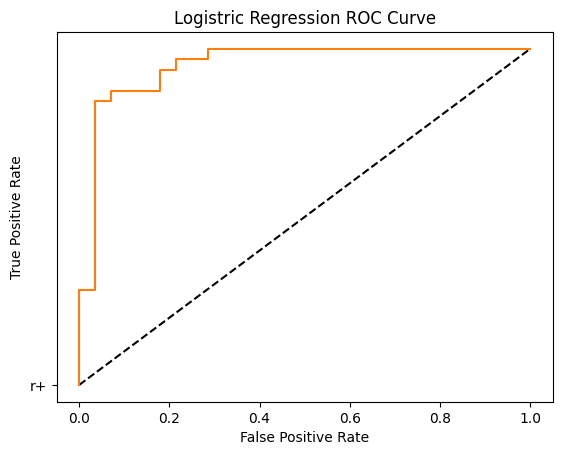

In [ ]:
# calculating the probabilities
y_pred_prob = lr.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [ ]:

    rf_model = RandomForestClassifier()
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [30, 10, 20, 40, ],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto','log2'],
        'criterion': ['gini','entropy']
    }
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
best_rf_model.fit(X_train, y_train)
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Accuracy on Test Set: {test_accuracy:.2f}')

Accuracy on Test Set: 0.88


Text(95.72222222222221, 0.5, 'Truh')

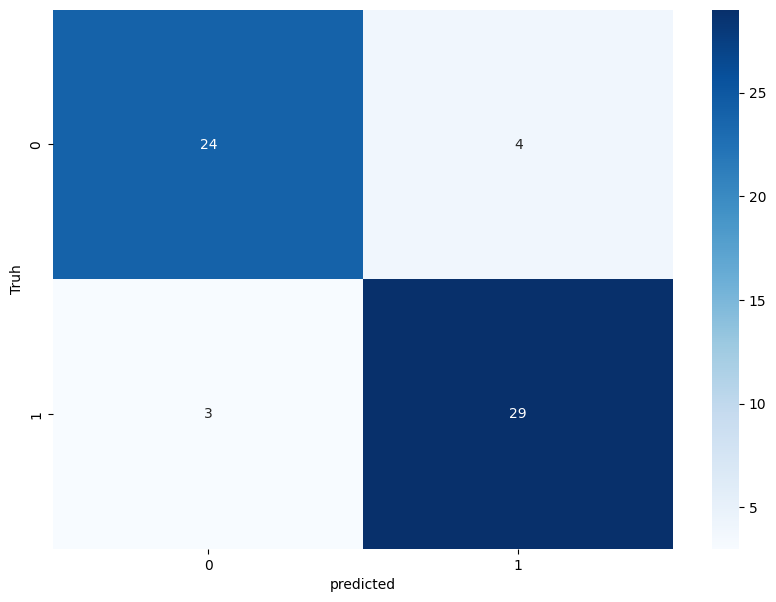

In [ ]:
cm1 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Truh')

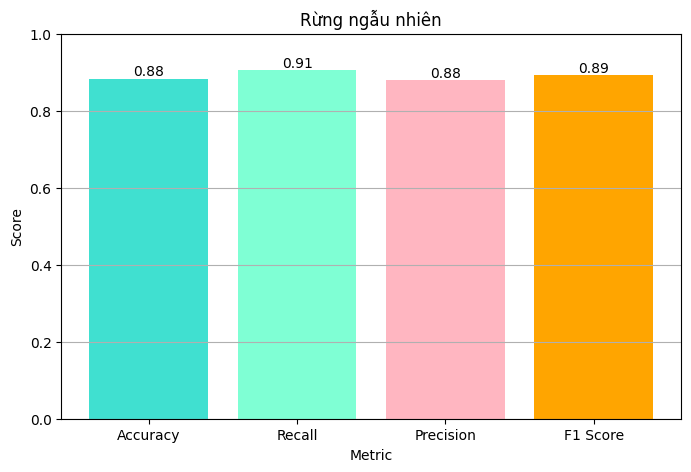

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các metric và giá trị tương ứng
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
test_scores = [test_accuracy, test_recall, test_precision, test_f1]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, test_scores, color=['#40e0d0', '#7fffd4', '#ffb6c1', 'orange'])
plt.title('Rừng ngẫu nhiên')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.grid(axis='y')

# Thêm giá trị cho mỗi cột
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)
    ada_best = grid.best_params_



In [ ]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=0)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2,3,5,10],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


In [ ]:
ada_best

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(splitter='random'),
                   learning_rate=0.0001, n_estimators=1, random_state=0)

In [ ]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = ada_best.predict(X_train)
y_test_pred = ada_best.predict(X_test)

# Tính các điểm đánh giá
training_accuracy = accuracy_score(y_train, y_train_pred)
training_recall = recall_score(y_train, y_train_pred)
training_precision = precision_score(y_train, y_train_pred)
training_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


Text(95.72222222222221, 0.5, 'Truh')

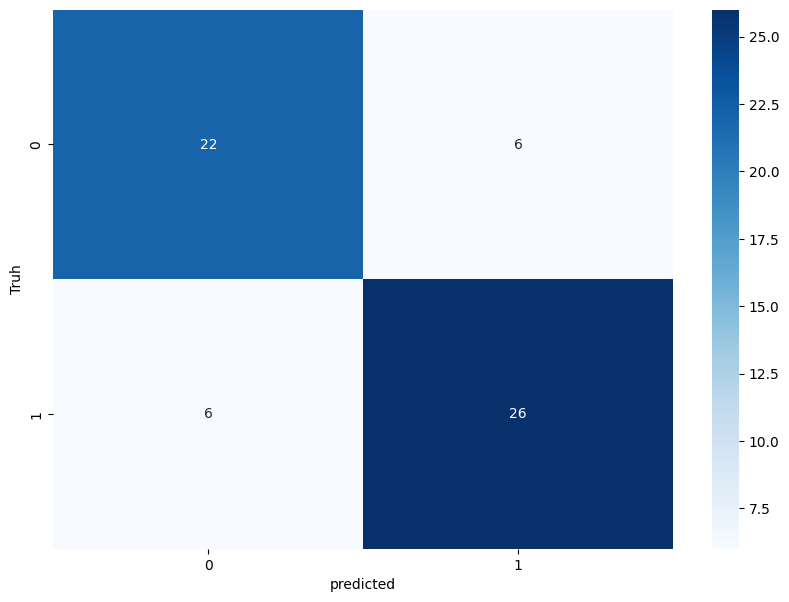

In [ ]:
cm1 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Truh')

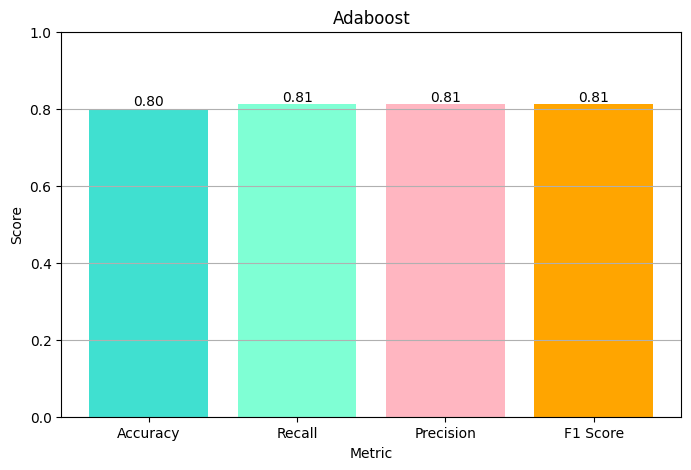

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các metric và giá trị tương ứng
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
test_scores = [test_accuracy, test_recall, test_precision, test_f1]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, test_scores, color=['#40e0d0', '#7fffd4', '#ffb6c1', 'orange'])
plt.title('Adaboost')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.grid(axis='y')

# Thêm giá trị cho mỗi cột
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Huấn luyện mô hình KNN với siêu tham số tốt nhất
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính các điểm đánh giá
training_accuracy = accuracy_score(y_train, y_train_pred)
training_recall = recall_score(y_train, y_train_pred)
training_precision = precision_score(y_train, y_train_pred)
training_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


Text(95.72222222222221, 0.5, 'Truh')

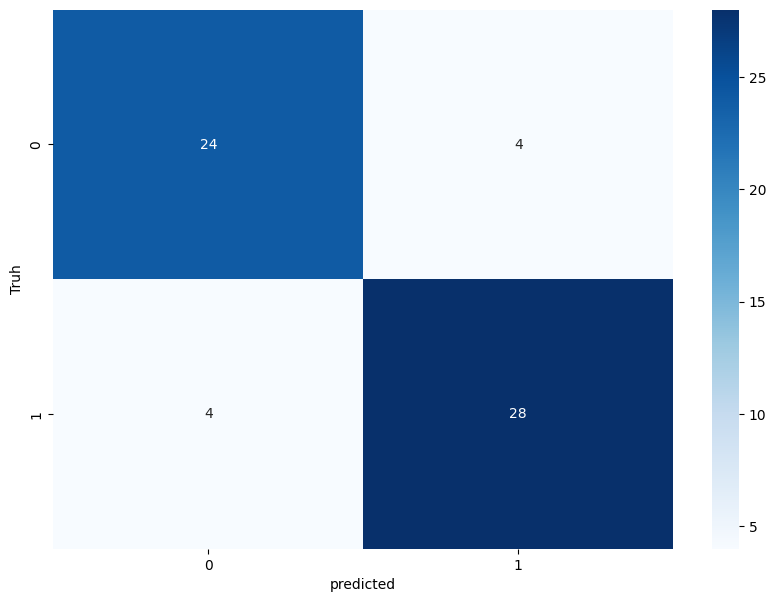

In [ ]:
cm1 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Truh')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=50)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(),
                            param_grid=param_grid_nb,
                            verbose=1, cv=5,
                            n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
GaussianNB(var_smoothing=0.0517947467923121)


In [ ]:
Gs = nbModel_grid.best_estimator_

In [ ]:
Gs

GaussianNB(var_smoothing=0.02310129700083159)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB

Gs.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = Gs.predict(X_train)
y_test_pred = Gs.predict(X_test)

# Tính các điểm đánh giá
training_accuracy = accuracy_score(y_train, y_train_pred)
training_recall = recall_score(y_train, y_train_pred)
training_precision = precision_score(y_train, y_train_pred)
training_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


Text(95.72222222222221, 0.5, 'Truh')

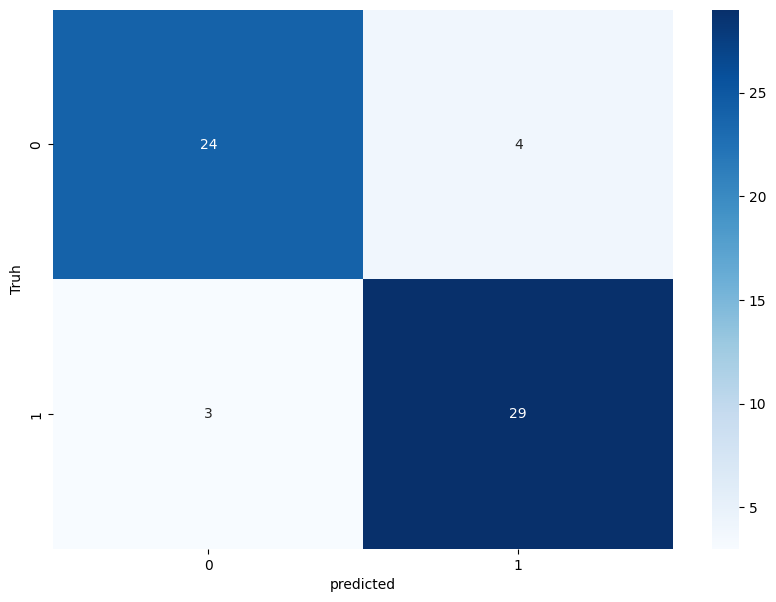

In [ ]:
cm1 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Truh')

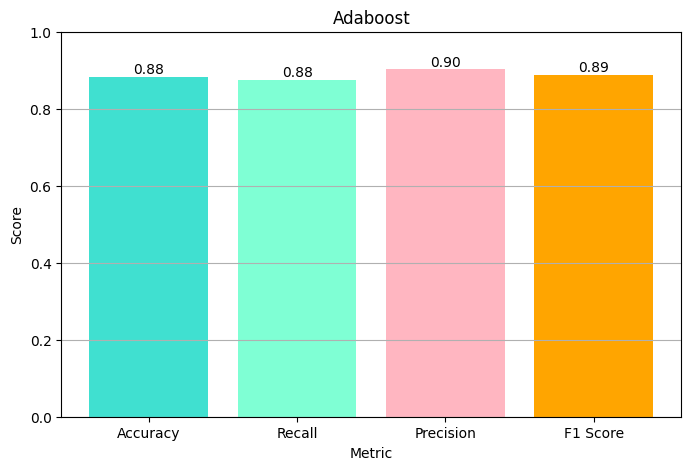

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các metric và giá trị tương ứng
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
test_scores = [test_accuracy, test_recall, test_precision, test_f1]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, test_scores, color=['#40e0d0', '#7fffd4', '#ffb6c1', 'orange'])
plt.title('Adaboost')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.grid(axis='y')

# Thêm giá trị cho mỗi cột
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = {
    'LogisticRegression': lr,
    'KNN': knn,
    'RandomForestClassifier': best_rf_model,
    'AdaBoost': ada_best,
    'Naye base Classifier': Gs
}
def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)

    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[model_name] = score

    return model_scores


In [ ]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8666666666666667,
 'KNN': 0.8666666666666667,
 'RandomForestClassifier': 0.9,
 'AdaBoost': 0.8,
 'Naye base Classifier': 0.8833333333333333}

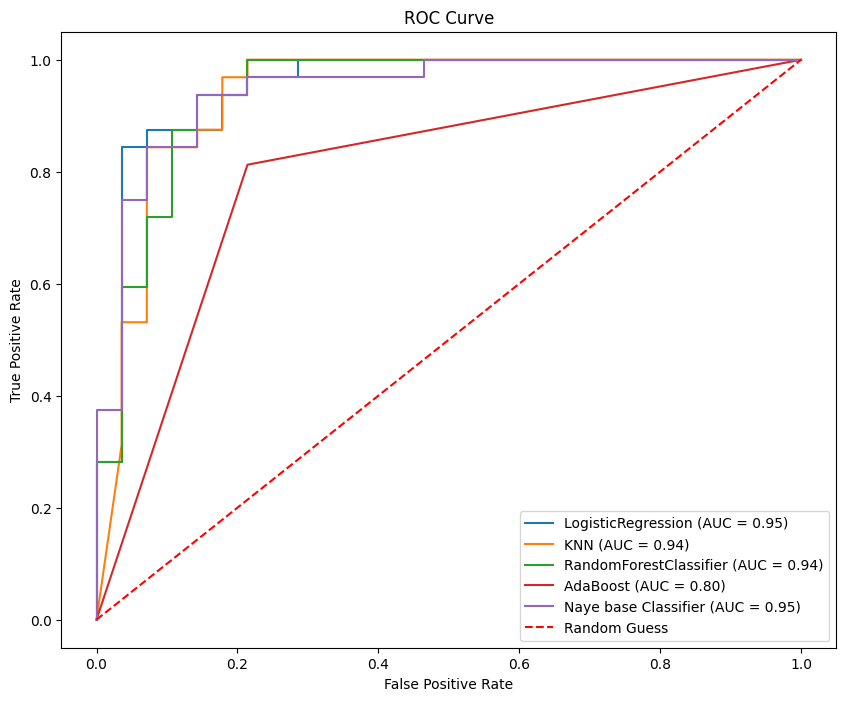

In [ ]:
from sklearn.metrics import roc_curve, auc

def roc_auc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            # Get predicted probabilities
            y_prob = model.predict_proba(X_test)[:, 1]
            # Compute ROC curve and ROC area
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot random guess line
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Sử dụng hàm
roc_auc_curve(models, X_test, y_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
report_data = []
for model_name, model_score in models.items():
    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']
    accuracy = accuracy_score(y_test, y_pred)
    report_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Support': support
    })
report_df = pd.DataFrame(report_data)
report_df



,Model,Accuracy,Precision,Recall,F1-Score,Support
0,LogisticRegression,0.866667,0.866667,0.866667,0.866667,60
1,KNN,0.866667,0.866667,0.866667,0.866667,60
2,RandomForestClassifier,0.883333,0.883502,0.883333,0.883170,60
3,AdaBoost,0.800000,0.800000,0.800000,0.800000,60
4,Naye base Classifier,0.883333,0.883502,0.883333,0.883170,60


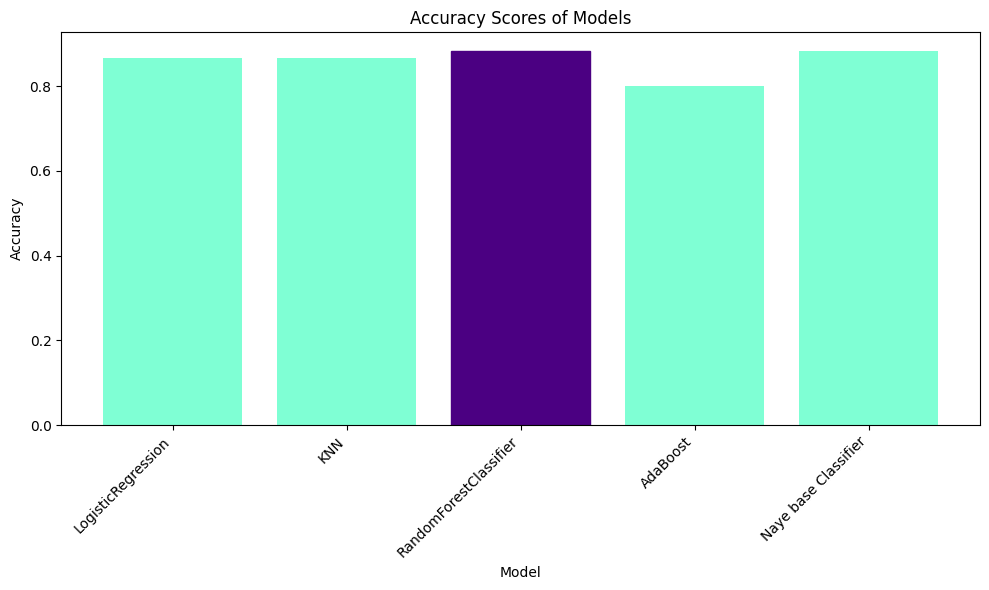

In [ ]:
import matplotlib.pyplot as plt

# Lấy tên mô hình và điểm accuracy từ DataFrame
models = report_df['Model']
accuracy_scores = report_df['Accuracy']

# Tìm chỉ số của cột có giá trị accuracy cao nhất
max_accuracy_index = accuracy_scores.idxmax()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='#7fffd4')

# Đánh dấu cột có giá trị accuracy cao nhất
bars[max_accuracy_index].set_color('#4b0082')

plt.title('Accuracy Scores of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.tight_layout()
plt.show()


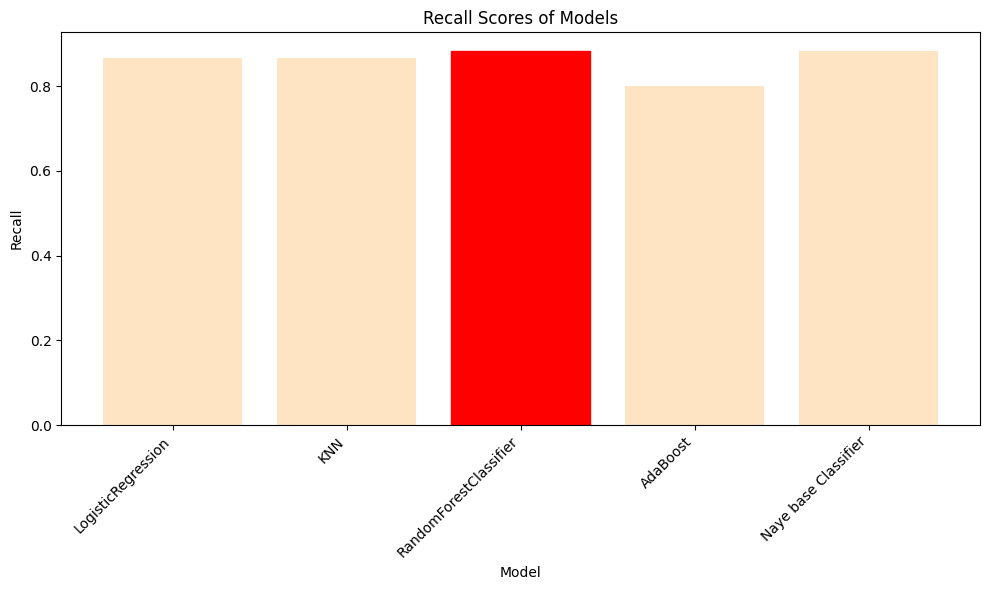

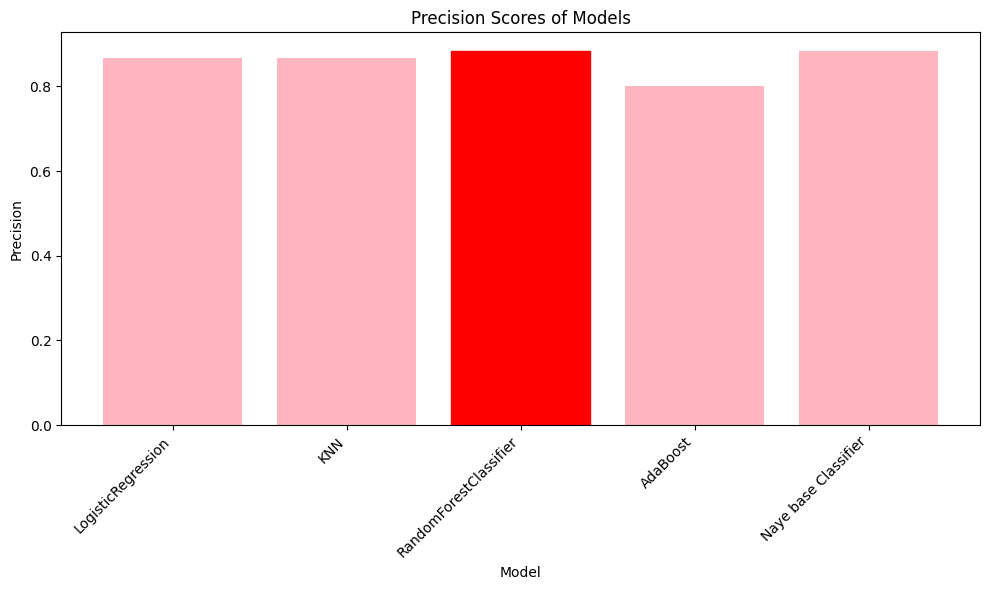

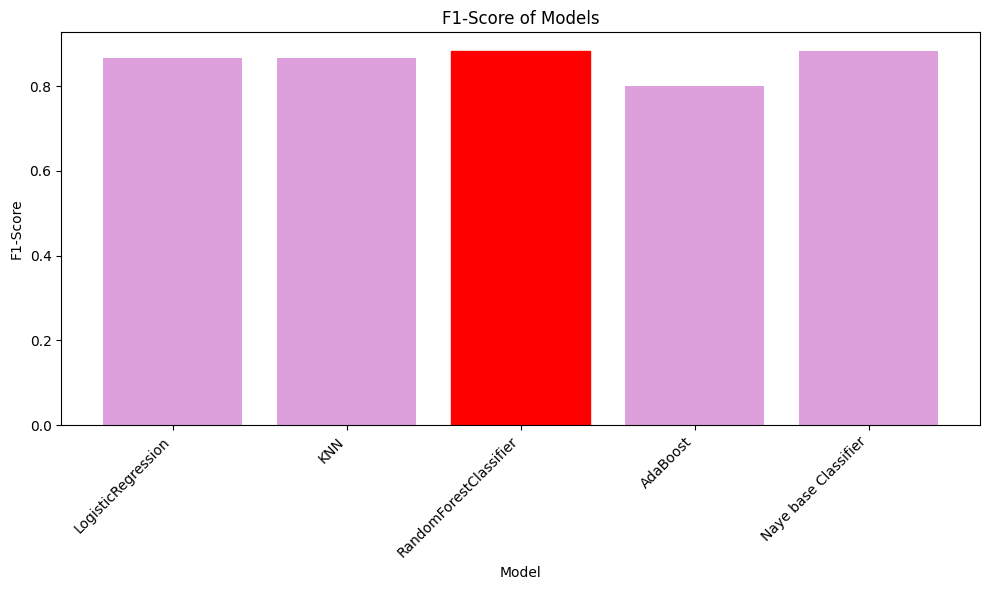

In [ ]:
import matplotlib.pyplot as plt

# Lấy tên mô hình và các điểm số từ DataFrame
models = report_df['Model']
recall_scores = report_df['Recall']
precision_scores = report_df['Precision']
f1_scores = report_df['F1-Score']

# Tìm chỉ số của cột có giá trị recall, precision, f1-score cao nhất
max_recall_index = recall_scores.idxmax()
max_precision_index = precision_scores.idxmax()
max_f1_index = f1_scores.idxmax()

# Vẽ biểu đồ cho recall
plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall_scores, color='#ffe4c4')
bars[max_recall_index].set_color('red')  # Đánh dấu cột có giá trị recall cao nhất
plt.title('Recall Scores of Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho precision
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision_scores, color='#ffb6c1')
bars[max_precision_index].set_color('red')  # Đánh dấu cột có giá trị precision cao nhất
plt.title('Precision Scores of Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho F1-score
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color='#dda0dd')
bars[max_f1_index].set_color('red')  # Đánh dấu cột có giá trị F1-score cao nhất
plt.title('F1-Score of Models')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
feature_dict = dict(zip(df.columns, best_rf_model.feature_importances_))


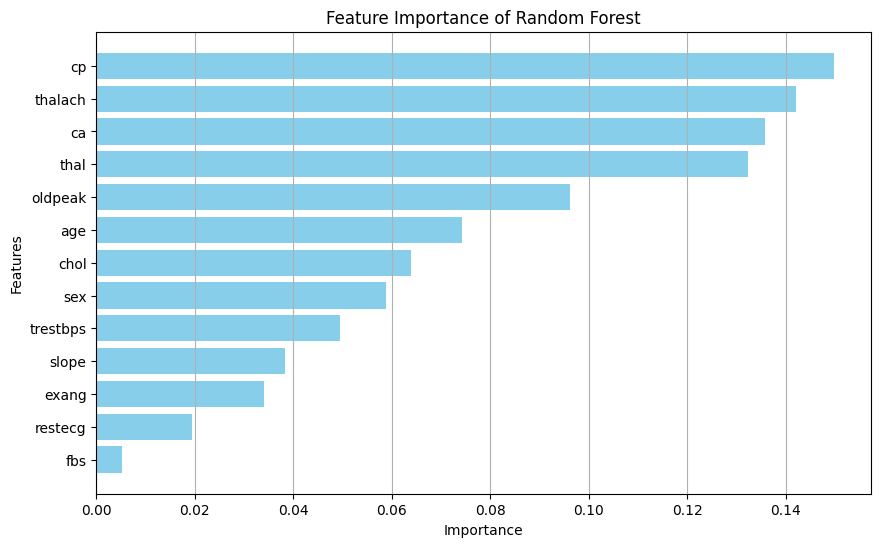

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming feature_dict is already defined
# Convert dictionary to DataFrame
feature_df = pd.DataFrame.from_dict(feature_dict, orient='index', columns=['Importance'])

# Sort the DataFrame by Importance in descending order
feature_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_df.index, feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Random Forest')
plt.grid(axis='x')
plt.show()


In [ ]:
from joblib import dump
import os

# Đường dẫn của thư mục
directory = '/content/drive/MyDrive/Tumblr Vietnam/'

# Tên tệp tin để lưu mô hình
model_filename = 'best_rf_model.joblib'

# Đường dẫn đầy đủ của tệp tin mô hình
model_path = os.path.join(directory, model_filename)

# Lưu mô hình
dump(best_rf_model, model_path)

print("Model saved successfully as", model_path)


Model saved successfully as /content/drive/MyDrive/Tumblr Vietnam/best_rf_model.joblib


In [ ]:
import pickle
import os

# Đường dẫn của thư mục
directory = '/content/drive/MyDrive/Tumblr Vietnam/'

# Tên tệp tin để lưu mô hình
model_filename = 'best_rf_model.pkl'

# Đường dẫn đầy đủ của tệp tin mô hình
model_path = os.path.join(directory, model_filename)

# Lưu mô hình
with open(model_path, 'wb') as f:
    pickle.dump(best_rf_model, f)

print("Model saved successfully as", model_path)


Model saved successfully as /content/drive/MyDrive/Tumblr Vietnam/best_rf_model.pkl
